Index(['ID', 'Prediction', 'True_Label', 'Unnamed: 3', 'student ID',
       'student Name', 'index', 'threshold', 'TPR', 'FPR'],
      dtype='object')


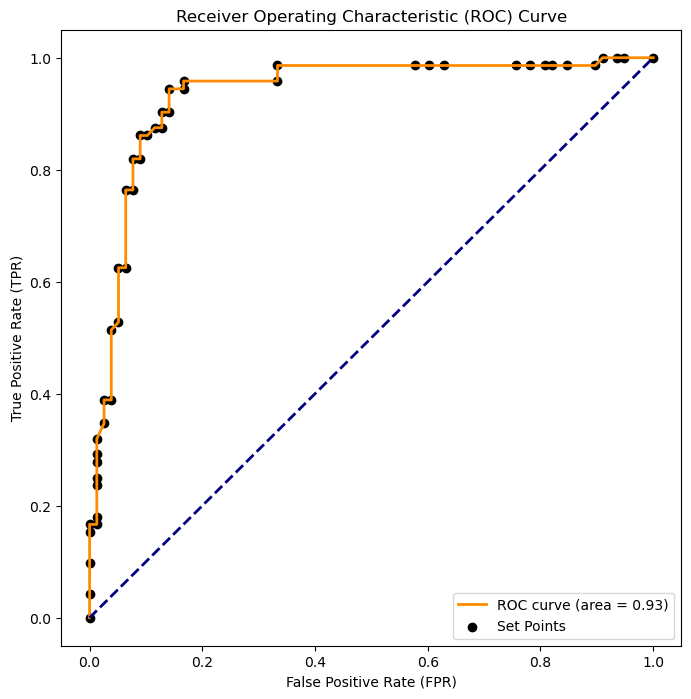

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = "ROC_dataset.csv"
data = pd.read_csv(file_path)

# Print column names for inspection
print(data.columns)

# Check if the required columns exist in the dataset with potential variations
if 'True_Label' not in data.columns.str.strip() or 'Prediction' not in data.columns.str.strip():
    raise KeyError("Columns 'True_Label' and 'Prediction' are required in the dataset.")

# Assuming 'True_Label' is the actual label and 'Prediction' is the predicted probability
y_true = data['True_Label']
y_pred = data['Prediction']

# Step 1: Create a confusion matrix based on the threshold
# You need to choose a threshold value; for this example, let's use 0.5
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Step 2: Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

# Step 3: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, marker='o', color='black', label='Set Points')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Column Names: Index(['word1', 'word2', 'word3', 'word4', 'spam'], dtype='object')


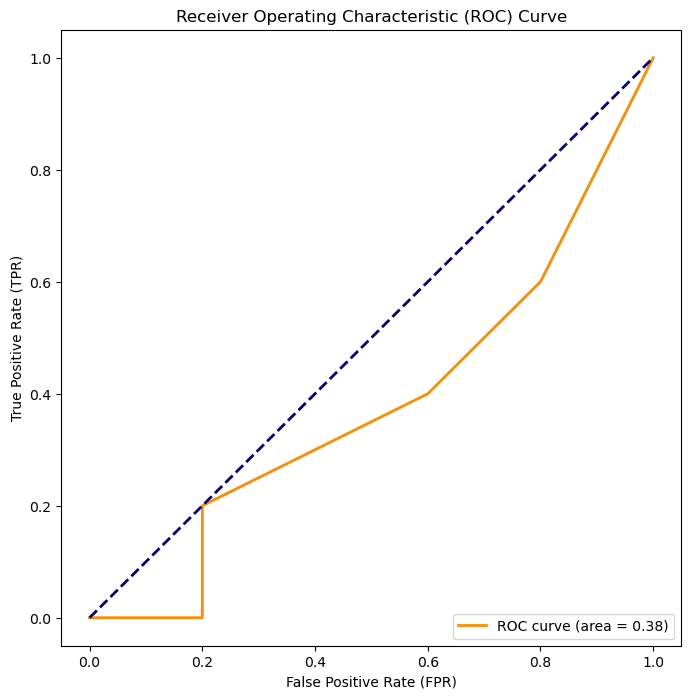

AUC Score: 0.38


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = "spam_dataset.csv"
data = pd.read_csv(file_path)

# Print column names for inspection
print("Column Names:", data.columns)

# Choose the correct target column name from the printed list
# Replacing 'your_target_column_name' with the actual column name
target_column_name = 'spam'

# Assuming the identified column is the target variable, and the rest are features
X = data.drop(target_column_name, axis=1)
y = data[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
# You may need to adjust parameters like max_depth based on your dataset
classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Output AUC score
print("AUC Score:", roc_auc)


In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "spam_dataset.csv"
data = pd.read_csv(file_path)

# Assuming 'spam' is the target variable, and the rest are features
X = data.drop('spam', axis=1)
y = data['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predictions
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Evaluate Naive Bayes
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate KNN
print("\nK-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Naive Bayes Classifier:
Accuracy: 0.2
Confusion Matrix:
 [[2 3]
 [5 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.00      0.00      0.00         5

    accuracy                           0.20        10
   macro avg       0.14      0.20      0.17        10
weighted avg       0.14      0.20      0.17        10


K-Nearest Neighbors Classifier:
Accuracy: 0.3
Confusion Matrix:
 [[2 3]
 [4 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.25      0.20      0.22         5

    accuracy                           0.30        10
   macro avg       0.29      0.30      0.29        10
weighted avg       0.29      0.30      0.29        10



In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Load the dataset
file_path = "ROC_dataset.csv"
data = pd.read_csv(file_path)

# Identify columns with non-numeric values
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
print("Columns with non-numeric values:", non_numeric_columns)

# Assuming 'True_Label' is the target variable, and the rest are features
X = data.drop('True_Label', axis=1)
y = data['True_Label']

# Drop non-numeric columns (you may choose to handle them differently)
X = X.select_dtypes(include=['number'])

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {'max_depth': [3, 5, 7, 10, None]}

try:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='roc_auc', error_score='raise')
    grid_search.fit(X_train, y_train)

    # Rest of the code remains the same...

except Exception as e:
    print("Error during grid search:", e)
    # Print the traceback
    import traceback
    traceback.print_exc()


Columns with non-numeric values: ['student Name']
